In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import StringIO

In [3]:
corona_df = pd.read_csv("./data/newly_confirmed_cases_daily.csv", index_col="pref_name")
latlong_df = pd.read_csv("data/pref_lat_lon.csv", index_col="pref_name")

# # コロナ感染データ
# corona_data = """
# pref_name,2020-1-16,2020-1-17,2020-1-18
# Hokkaido,3,4,300
# Aomori,231,333,56
# """

# # 県ごとの緯度経度データ
# latlong_data = """
# pref_name,lat,lon
# Hokkaido,43.064359,141.347449
# Aomori,40.824294,140.740054
# """

/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_55954/368473571.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(lon, lat, int(date.split("-")[2]), c=color, s=20)


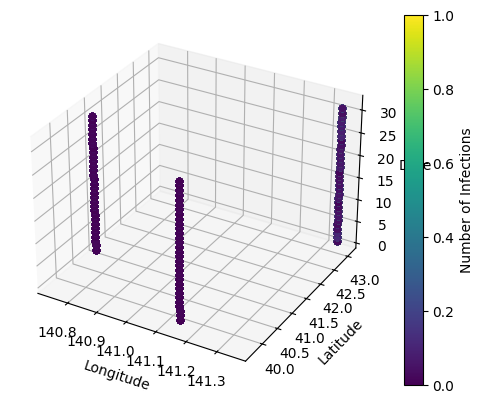

In [10]:
# 三次元ヒートマップの描画
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# カラーマップの設定
cmap = plt.get_cmap("viridis")  # viridisはカラーマップの一例

# 県ごとに繰り返し
for pref_name in corona_df.index:
    # 緯度経度取得
    lat = latlong_df.loc[pref_name, "lat"]
    lon = latlong_df.loc[pref_name, "lon"]

    # 日ごとに繰り返し
    for date, value in corona_df.loc[pref_name].items():
        size = value * 0.1
        # 点の透明度を設定する（適宜調整）
        alpha = 0.1

        color = cmap(value / corona_df.max().max())  # 値の割合で色を指定

        ax.scatter(lon, lat, int(date.split("-")[2]), c=color, s=20)

        # ax.scatter(lon, lat, int(date.split("-")[2]), c=value, cmap="viridis")

# カラーバーの表示
cbar = plt.colorbar(ax.collections[0])
cbar.set_label("Number of Infections")

# 軸ラベルの設定
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Date")

plt.show()